## 1. Preparing our dataset
<p><em>These recommendations are so on point! How does this playlist know me so well?</em></p>
<p><img src="https://assets.datacamp.com/production/project_449/img/iphone_music.jpg" alt="Project Image Record" width="600px"></p>
<p>Over the past few years, streaming services with huge catalogs have become the primary means through which most people listen to their favorite music. But at the same time, the sheer amount of music on offer can mean users might be a bit overwhelmed when trying to look for newer music that suits their tastes.</p>
<p>For this reason, streaming services have looked into means of categorizing music to allow for personalized recommendations. One method involves direct analysis of the raw audio information in a given song, scoring the raw data on a variety of metrics. Today, we'll be examining data compiled by a research group known as The Echo Nest. Our goal is to look through this dataset and classify songs as being either 'Hip-Hop' or 'Rock' - all without listening to a single one ourselves. In doing so, we will learn how to clean our data, do some exploratory data visualization, and use feature reduction towards the goal of feeding our data through some simple machine learning algorithms, such as decision trees and logistic regression.</p>

In [11]:
import pandas as pd

# Read in track metadata with genre labels
tracks = pd.read_csv('datasets/fma-rock-vs-hiphop.csv')

# Read in track metrics with the features
echonest_metrics = pd.read_json('datasets/echonest-metrics.json')

# Merge the relevant columns of tracks and echonest_metrics
echo_tracks = echonest_metrics.merge \
(tracks.loc[:,['track_id','genre_top']], on='track_id')

# Inspect the resultant dataframe
echo_tracks.head(10)

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,Hip-Hop
4,153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,Rock
5,154,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632,Rock
6,155,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325,Rock
7,169,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347,Rock
8,170,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548,Rock
9,171,0.698278,0.285816,0.213494,0.955691,0.087036,0.064094,125.645,0.150599,Rock


In [12]:
echonest_metrics.head(10)

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072
5,139,0.106550,0.260911,0.607067,0.835087,0.223676,0.030569,196.961,0.160267
6,140,0.376312,0.734079,0.265685,0.669581,0.085995,0.039068,107.952,0.609991
7,141,0.963657,0.435933,0.075632,0.345493,0.105686,0.026658,33.477,0.163950
8,142,0.662881,0.379065,0.823856,0.910266,0.088705,0.079090,147.781,0.092868
9,144,0.909011,0.443643,0.641997,0.924092,0.267669,0.089659,128.537,0.788251


In [13]:
tracks.head(10)

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood
5,154,256000,0,Arc and Sender,2008-11-26 01:45:04,2008-11-26 00:00:00,319,1,Rock,[26],...,NaN,242,en,Attribution-NonCommercial-NoDerivatives (aka M...,205,NaN,4,NaN,[],Squares And Circles
6,155,192000,0,NaN,2008-11-26 01:45:10,2008-11-26 00:00:00,756,1,Rock,[26],...,NaN,268,en,Attribution-NonCommercial-NoDerivatives (aka M...,197,NaN,0,NaN,[],Maps of the Stars Homes
7,169,192000,0,James Squeaky,2008-11-26 01:46:02,2006-01-01 00:00:00,144,1,Rock,[25],...,NaN,815,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,270,NaN,1,NaN,[],Boss of Goth
8,170,192000,0,NaN,2008-11-26 01:46:05,2006-10-07 00:00:00,181,0,Rock,[25],...,NaN,468,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,122,NaN,2,NaN,[],Industry Standard Massacre
9,171,320000,0,NaN,2008-11-26 01:46:07,2008-11-26 00:00:00,80,0,Rock,[25],...,<p>Unreleased</p>,582,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,242,NaN,2,NaN,[],Marching as Technitions


In [14]:
echo_tracks = echo_tracks[['track_id','acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'speechiness', 'tempo', 'valence', 'genre_top']]

echo_tracks.columns

Index(['track_id', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence',
       'genre_top'],
      dtype='object')

## 2. Pairwise relationships between continuous variables

In [15]:
# Create a correlation matrix
corr_metrics = echo_tracks.drop(columns=['genre_top']).corr()
corr_metrics.style.background_gradient()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


## 3. Splitting our data

In [16]:
# Import train_test_split function and Decision tree classifier
from sklearn.model_selection import train_test_split

# Create features
features = echo_tracks.drop(columns = ['genre_top','track_id']).values

# Create labels
labels = echo_tracks['genre_top'].values

# Split our data
train_features, test_features, train_labels, test_labels = \
train_test_split(features,labels, random_state = 10)

## 4. Normalizing the feature data Using PCA

In [17]:
# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale the features and set the values to a new variable
scaler = StandardScaler()

# Scale train_features and test_features
scaled_train_features = scaler.fit_transform(train_features)
scaled_test_features = scaler.transform(test_features)

In [18]:
# # Import the StandardScaler
# from sklearn.preprocessing import StandardScaler

# # Scale train_features and set the values to a new variable
# scaler = StandardScaler()

# # Scale train_features and test_features
# scaled_train_features = scaler.fit_transform(train_features)
# scaled_test_features = scaler.transform(test_features)

## 5. Principal Component Analysis on our scaled data


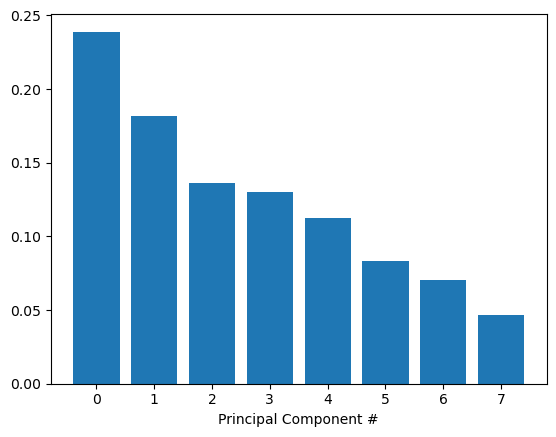

<Figure size 640x480 with 0 Axes>

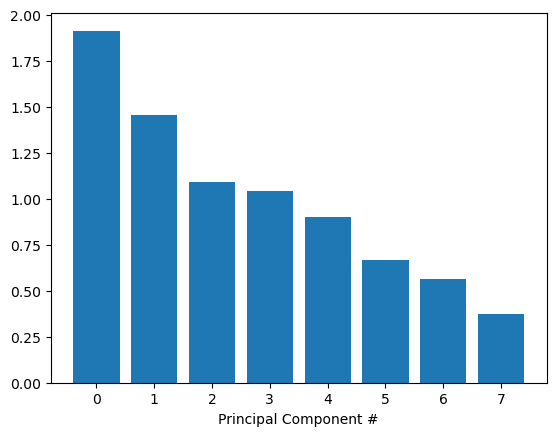

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

# Import our plotting module, and PCA class
from sklearn.decomposition import PCA

# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(scaled_train_features)
exp_variance = pca.explained_variance_ratio_
exp_variance2 = pca.explained_variance_

# plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance)
ax.set_xlabel('Principal Component #')
plt.show()
plt.clf()

fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance2)
ax.set_xlabel('Principal Component #')
plt.show()

## 6. Further visualization of PCA
<p>Unfortunately, there does not appear to be a clear elbow in this scree plot, which means it is not straightforward to find the number of intrinsic dimensions using this method. </p>
<p>But all is not lost! Instead, we can also look at the <strong>cumulative explained variance plot</strong> to determine how many features are required to explain, say, about 85% of the variance (cutoffs are somewhat arbitrary here, and usually decided upon by 'rules of thumb'). Once we determine the appropriate number of components, we can perform PCA with that many components, ideally reducing the dimensionality of our data.</p>

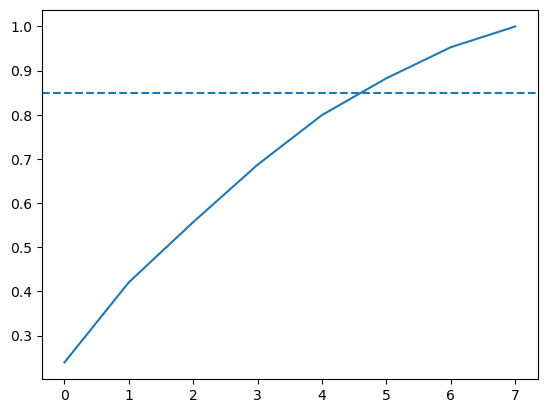

<Figure size 640x480 with 0 Axes>

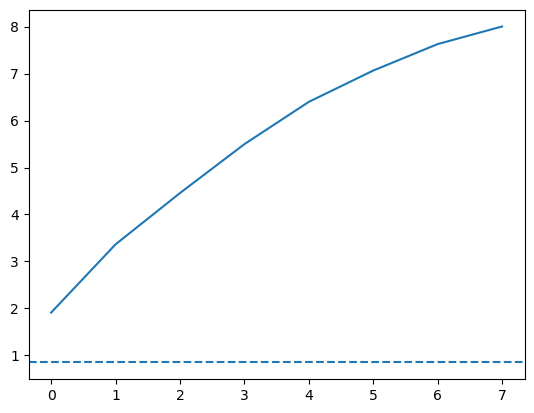

In [20]:
# Import numpy
import numpy as np

# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(pca.explained_variance_ratio_)
cum_exp_variance2 = np.cumsum(pca.explained_variance_)

# Plot the cumulative explained variance and draw a dashed line at 0.85.
fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.85, linestyle='--')
plt.show()
plt.clf()


# Plot the cumulative explained variance and draw a dashed line at 0.85.
fig, ax = plt.subplots()
ax.plot(cum_exp_variance2)
ax.axhline(y=0.85, linestyle='--')
plt.show()

## 7. Projecting on to our features
<p>We saw from the plot that 6 features (remember indexing starts at 0) can explain 85% of the variance! </p>

In [21]:
# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components = 6, random_state = 10)

# Fit and transform the scaled training features using pca
train_pca = pca.fit_transform(scaled_train_features)

# Fit and transform the scaled test features using pca
test_pca = pca.transform(scaled_test_features)

## 8. Train a decision tree to classify genre
<p>Now we can use the lower dimensional PCA projection of the data to classify songs into genres. </p>

In [22]:
# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Train our decision tree
tree = DecisionTreeClassifier(random_state = 10)
tree.fit(train_pca, train_labels)

# Predict the labels for the test data
pred_labels_tree = tree.predict(test_pca)

## 9. Compare our decision tree to a logistic regression


In [23]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Train our logistic regression and predict labels for the test set
logreg = LogisticRegression(random_state = 10)
logreg.fit(train_pca, train_labels)
pred_labels_logit = logreg.predict(test_pca)

# Create the classification report for both models
from sklearn.metrics import classification_report
class_rep_tree = classification_report(test_labels, pred_labels_tree)
class_rep_log = classification_report(test_labels, pred_labels_logit)

print("Decision Tree: \n", class_rep_tree)
print("\nLogistic Regression: \n", class_rep_log)

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.63      0.62      0.62       235
        Rock       0.91      0.91      0.91       966

    accuracy                           0.85      1201
   macro avg       0.77      0.77      0.77      1201
weighted avg       0.85      0.85      0.85      1201


Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.77      0.54      0.64       235
        Rock       0.90      0.96      0.93       966

    accuracy                           0.88      1201
   macro avg       0.83      0.75      0.78      1201
weighted avg       0.87      0.88      0.87      1201



## 10. Balance our data for greater performance


In [24]:
# Subset only the hip-hop tracks, and then only the rock tracks
hop_only = echo_tracks[echo_tracks['genre_top'] == 'Hip-Hop']
rock_only = echo_tracks[echo_tracks['genre_top'] == 'Rock']

# sample the rocks songs to be the same number as there are hip-hop songs
rock_only = rock_only.sample(hop_only.shape[0], random_state=10)

# concatenate the dataframes rock_only and hop_only
rock_hop_bal = pd.concat([rock_only,hop_only])

# The features, labels, and pca projection are created for the balanced dataframe
features = rock_hop_bal.drop(['genre_top', 'track_id'], axis=1) 
labels = rock_hop_bal['genre_top']

# Redefine the train and test set with the pca_projection from the balanced data
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, random_state=10)

train_pca = pca.fit_transform(scaler.fit_transform(train_features))
test_pca = pca.transform(scaler.transform(test_features))

In [25]:
# # Subset a balanced proportion of data points
# hop_only = echo_tracks.loc[echo_tracks['genre_top'] == 'Hip-Hop']
# rock_only = echo_tracks.loc[echo_tracks['genre_top'] == 'Rock']

# # subset only the rock songs, and take a sample the same size as there are hip-hop songs
# rock_only = rock_only.sample(hop_only.shape[0], random_state=10)

# # concatenate the dataframes hop_only and rock_only
# rock_hop_bal = pd.concat([rock_only, hop_only])

# # The features, labels, and pca projection are created for the balanced dataframe
# features = rock_hop_bal.drop(['genre_top', 'track_id'], axis=1) 
# labels = rock_hop_bal['genre_top']

# # Redefine the train and test set with the pca_projection from the balanced data
# train_features, test_features, train_labels, test_labels = train_test_split(
#     features, labels, random_state=10)

# train_pca = pca.fit_transform(scaler.fit_transform(train_features))
# test_pca = pca.transform(scaler.transform(test_features))

## 11. Does balancing our dataset improve model bias?


In [26]:
# Train our decision tree on the balanced data
tree = DecisionTreeClassifier(random_state = 10)
tree.fit(train_pca, train_labels)
pred_labels_tree = tree.predict(test_pca)

# Train our logistic regression on the balanced data
logreg = LogisticRegression(random_state = 10)
logreg.fit(train_pca, train_labels)
pred_labels_logit = logreg.predict(test_pca)

# Compare the models
print("Decision Tree: \n", classification_report(test_labels, pred_labels_tree))
print("\nLogistic Regression: \n", classification_report(test_labels, pred_labels_logit))

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.82      0.77      0.79       230
        Rock       0.78      0.82      0.80       225

    accuracy                           0.80       455
   macro avg       0.80      0.80      0.80       455
weighted avg       0.80      0.80      0.80       455


Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.84      0.80      0.82       230
        Rock       0.81      0.85      0.83       225

    accuracy                           0.82       455
   macro avg       0.82      0.82      0.82       455
weighted avg       0.83      0.82      0.82       455



## 12. Using cross-validation to evaluate our models


In [27]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
tree_pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=6)), 
                      ("tree", DecisionTreeClassifier(random_state=10))])
logreg_pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=6)), 
                        ("logreg", LogisticRegression(random_state=10))])

# Set up our K-fold cross-validation
kf = KFold(n_splits = 10)

# Train our models using KFold cv
tree_score = cross_val_score(tree_pipe, features, labels, cv=kf)
logit_score = cross_val_score(logreg_pipe, features, labels, cv=kf)

# Print the mean of each array o scores
print("Decision Tree:", np.mean(tree_score), "Logistic Regression:", np.mean(logit_score))

Decision Tree: 0.7582417582417582 Logistic Regression: 0.782967032967033


## **Logistic Regression is Better**